In [34]:
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_null=train.isnull().sum()
train_null[train_null>0].sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
dtype: int64

74.20382165605095
18.890814558058924


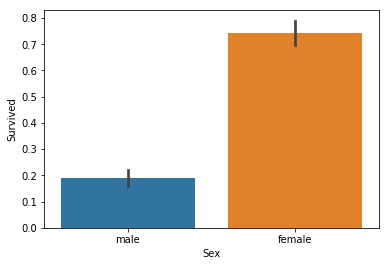

In [24]:
sns.barplot(x='Sex',y='Survived',data=train)

print(train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1]*100)
print(train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1]*100)

In [26]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

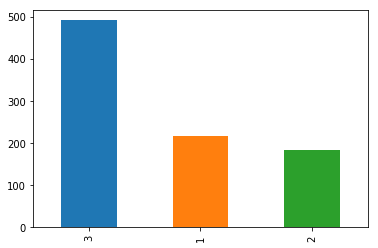

In [29]:
train['Pclass'].value_counts().plot.bar()


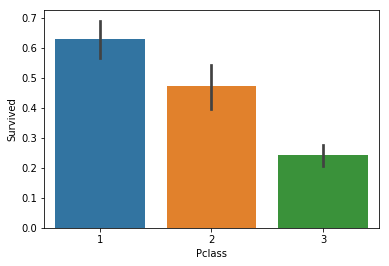

In [31]:
sns.barplot(x='Pclass',y='Survived',data=train)

In [32]:
train['Age']=train.Age.fillna(-0.5)
test['Age']=test.Age.fillna(-0.5)

In [39]:
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels=['Unknown','Baby','Child','Student','College',' Adult','Senior Adult','Senior']

train['Agegroup']=pd.cut(train['Age'],bins,labels=labels)
test['Agegroup']=pd.cut(test['Age'],bins,labels=labels)

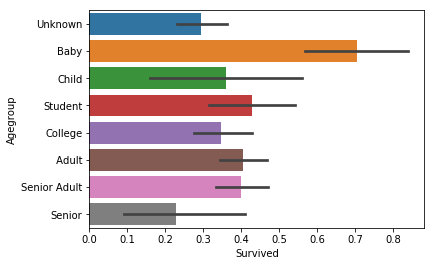

In [40]:
sns.barplot(x='Survived',y='Agegroup',data=train)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,College
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [42]:
combine=[train,test]

In [78]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
  
   

In [79]:
pd.crosstab(train['Title'],train['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [81]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady','Capt','Col','Don','Dr','Major',
                                              'Rev','Jonkheer','Dona'],'Rare')
    
    dataset['Title']=dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
    
    dataset['Title']=dataset['Title'].replace(['Mlle','Ms'],'Miss')
    
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')

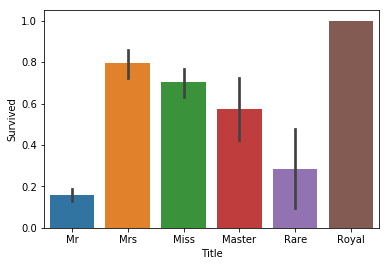

In [85]:
sns.barplot(x='Title',y='Survived',data=train)